In [1]:
import numpy as np
import os
import time

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
import json
import math
import os
from glob import glob 
from tqdm import tqdm
from PIL import Image
import cv2 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.applications.vgg16 import VGG16
from keras.utils.np_utils import to_categorical
from keras.layers import  Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator, load_img

In [3]:
mainDIR = os.listdir('C:/Users/정하민/Desktop/인공지능/과제/데이터/chest_xray/')
print(mainDIR)

['.DS_Store', 'test', 'train', 'val']


In [4]:
train_folder= 'C:/Users/정하민/Desktop/인공지능/과제/데이터/chest_xray/train/'
val_folder = 'C:/Users/정하민/Desktop/인공지능/과제/데이터/chest_xray/val/'
test_folder = 'C:/Users/정하민/Desktop/인공지능/과제/데이터/chest_xray/test/'
input_dir = "C:/Users/정하민/Desktop/인공지능/과제/데이터/"

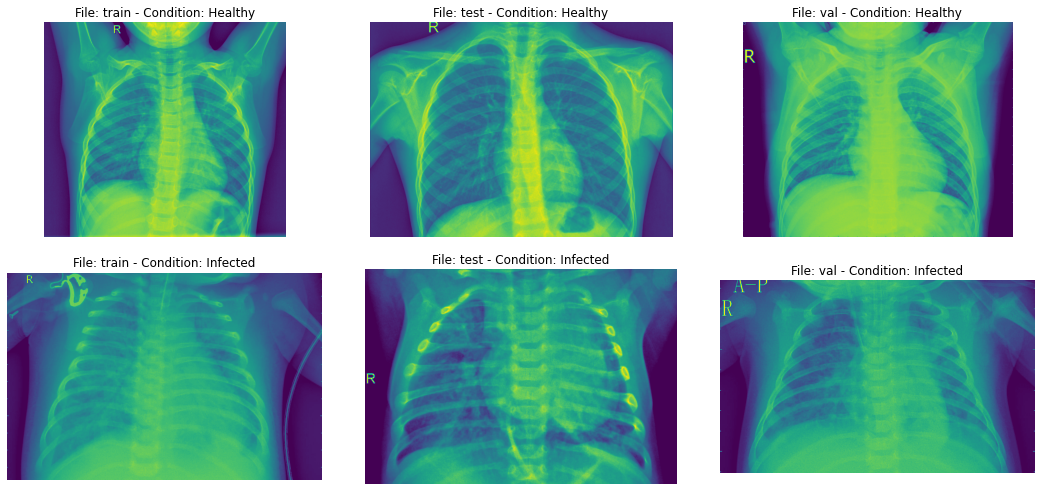

In [5]:
fig, ax = plt.subplots(2,3, figsize=(15,7))
ax = ax.ravel()
plt.tight_layout()
for i, _set in enumerate(['train','test','val']):
    set_path = input_dir+_set
    ax[i].axis('off')
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]))
    ax[i].set_title('File: {} - Condition: Healthy'.format(_set))
    ax[i+3].axis('off')
    ax[i+3].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]))
    ax[i+3].set_title('File: {} - Condition: Infected'.format(_set))

In [6]:
from keras import layers, models
from keras.applications.vgg16 import VGG16
from keras import Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
 

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('C:/Users/정하민/Desktop/인공지능/과제/데이터/chest_xray/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory('C:/Users/정하민/Desktop/인공지능/과제/데이터/chest_xray/val/',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory('C:/Users/정하민/Desktop/인공지능/과제/데이터/chest_xray/test/',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
vgg = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
for layer in vgg.layers:
    layer.trainable = False #making all the layers non-trainable
    
x = Flatten()(vgg.output) #flattening out the last layer
predictions = Dense(2,activation='softmax')(x) #Dense layer to predict wether their is pneumonia or not
model = Model(vgg.input, predictions)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
hist = model.fit_generator(training_set,
        steps_per_epoch=10,
        epochs=10,
        validation_data=test_set,
        validation_steps=10)

c:\users\정하민\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 29s 2s/step - loss: 1.6233 - accuracy: 0.5094 - val_loss: 0.3758 - val_accuracy: 0.8313
Epoch 2/10
10/10 [==============================] - 20s 2s/step - loss: 0.3523 - accuracy: 0.8319 - val_loss: 0.3226 - val_accuracy: 0.8750
Epoch 3/10
10/10 [==============================] - 19s 2s/step - loss: 0.2048 - accuracy: 0.9039 - val_loss: 0.6904 - val_accuracy: 0.7688
Epoch 4/10
10/10 [==============================] - 21s 2s/step - loss: 0.1937 - accuracy: 0.9128 - val_loss: 0.4619 - val_accuracy: 0.8313
Epoch 5/10
10/10 [==============================] - 20s 2s/step - loss: 0.2917 - accuracy: 0.8778 - val_loss: 0.5895 - val_accuracy: 0.7875
Epoch 6/10
10/10 [==============================] - 19s 2s/step - loss: 0.2491 - accuracy: 0.8928 - val_loss: 0.2839 - val_accuracy: 0.9000
Epoch 7/10
10/10 [==============================] - 20s 2s/step - loss: 0.0518 - accuracy: 0.9929 - val_loss: 0.3456 - val_accuracy: 0.8813
Epoch 8/10
10/10 [==

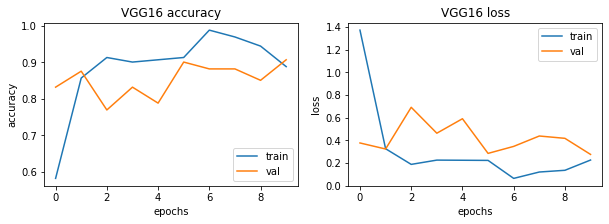

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))


for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('VGG16 {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])